In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os
import feather
import timeit

In [171]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [172]:
def cum_return(r, begdate, enddate, weights):
    """Computing portfolio returns in given time horizon, with specific weights

    Returns an array which shows the cumulative returns.
    """

    dates_perf = r.iloc[begdate:enddate].index.get_level_values(0)

    p_perf = np.zeros(len(dates_perf))
    tmp = np.multiply(weights,r.iloc[begdate:enddate])
    p_perf = tmp.sum(axis=1)
    
    return p_perf

In [173]:
def plot_cum_return(r, begdate, enddate):
    """Computing portfolio returns in given time horizon, with specific weights

    Returns an array which shows the cumulative returns.
    """

    #total return index
    dates_cumperf = r.iloc[begdate-1:enddate].index.get_level_values(0)
    cumperf = np.cumprod(np.concatenate((np.ones(1),1+p_perf),axis=0),axis=0)
    df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf)

    df_cumperf.plot()
    plt.xlabel('Time')
    plt.ylabel('Cumulative performance of one dollar')
    print('\n (d) Cumulative performance of 1$ invested in the first day:')
    plt.show()
    
    return ''

In [174]:
#computing portfolio returns
dates_perf = r.iloc[7288:7540].index.get_level_values(0)

p_perf = np.zeros(len(dates_perf))
tmp = np.multiply(weights,r.iloc[7288:7540])
p_perf = tmp.sum(axis=1)
p_perf



date
2017-12-01   -0.002157
2017-12-04   -0.003470
2017-12-05   -0.006143
2017-12-06   -0.007925
2017-12-07    0.006435
                ...   
2018-11-26    0.006517
2018-11-27   -0.006437
2018-11-28    0.018831
2018-11-29   -0.001377
2018-11-30    0.003027
Length: 252, dtype: float64

In [175]:
# read the prices from feather
dirpath = os.getcwd()
myfile = 'Equities_prices.feather'

In [176]:
prices = pd.read_feather(myfile, columns=None, use_threads=True);

In [177]:
prices.shape #7559 dates, 25572 stocks
prices

,date,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
0,1989-01-03,0.7500,55.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.875,NaN,NaN,NaN,NaN,NaN
1,1989-01-04,0.7500,56.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
2,1989-01-05,0.7500,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
3,1989-01-06,0.9375,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
4,1989-01-09,1.0000,58.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,2018-12-24,62.6700,25.150,NaN,NaN,NaN,NaN,12.6847,NaN,55.71,...,NaN,NaN,NaN,NaN,NaN,11.08,2.94,NaN,NaN,NaN
7555,2018-12-26,65.5400,27.140,NaN,NaN,NaN,NaN,12.6650,NaN,57.90,...,NaN,NaN,NaN,NaN,NaN,11.99,2.92,NaN,NaN,NaN
7556,2018-12-27,66.4800,27.160,NaN,NaN,NaN,NaN,12.7495,NaN,57.97,...,NaN,NaN,NaN,NaN,NaN,11.70,2.95,NaN,NaN,NaN
7557,2018-12-28,65.9600,26.600,NaN,NaN,NaN,NaN,12.7989,NaN,58.35,...,NaN,NaN,NaN,NaN,NaN,13.65,2.92,NaN,NaN,NaN


In [178]:
# Setting the thresholds:
Lower_threshold = 0.9
Upper_threshold = 0.95

In [179]:
prices['date'] = add_freq(prices['date'], freq='D')

In [180]:
prices['inx'] = prices.index
start_months_dates = prices.set_index('date').resample('MS').first()['inx'].values

In [181]:
start_months = prices[prices.inx.isin(start_months_dates)]
start_months.drop(['inx'], axis = 1, inplace=True)
prices.drop(['inx'], axis = 1, inplace=True)
wo_date_prices = prices.drop(['date'], axis = 1)

In [182]:
#log returns of all the columns at once
r = np.log(prices.set_index('date')).diff()
r.head()

C:\Users\Ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,AABC,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
date,,,,,,,,,,,,,,,,,,,,,
1989-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-04,0.000000,0.013334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,NaN,NaN
1989-01-05,0.000000,0.017506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1989-01-06,0.223144,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1989-01-09,0.064539,0.008639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.004988,NaN,NaN,NaN,NaN,NaN


In [183]:
#ticker='IBM'
#begdate=enddate-relativedelta(years=1)
#p = getData(ticker, begdate, enddate,asobject=True, adjusted=True)
#x=p[-1]
#y=np.array(p.tolist())[:,-1]
#high=max(y)
#low=min(y)
#print(" Today, Price High Low, % from low ")
#print(x[0], x[-1], high, low, round((x[-1]-low)/(high-low)*100,2))

In [184]:
#prices['date'] = pd.DatetimeIndex(prices['date'], dtype='datetime64[ns]', freq='D', tz=None).to_pydatetime().tolist()
start_months

,date,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
0,1989-01-03,0.7500,55.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.875,NaN,NaN,NaN,NaN,NaN
21,1989-02-01,0.8125,64.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
40,1989-03-01,0.8125,61.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.250,NaN,NaN,NaN,NaN,NaN
62,1989-04-03,0.6875,59.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.500,NaN,NaN,NaN,NaN,NaN
82,1989-05-01,0.6250,62.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.750,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,2018-08-01,64.9800,42.040,NaN,NaN,NaN,NaN,NaN,NaN,73.18,...,NaN,NaN,NaN,NaN,NaN,12.40,6.42,NaN,NaN,NaN
7477,2018-09-04,67.2700,43.360,NaN,NaN,NaN,NaN,11.9200,NaN,67.96,...,NaN,NaN,NaN,NaN,NaN,13.49,8.12,NaN,NaN,NaN
7496,2018-10-01,71.2600,40.860,NaN,NaN,NaN,NaN,11.8899,NaN,67.24,...,NaN,NaN,NaN,NaN,NaN,15.44,7.86,NaN,NaN,NaN
7519,2018-11-01,65.2200,36.780,NaN,NaN,NaN,NaN,12.3400,NaN,62.86,...,NaN,NaN,NaN,NaN,NaN,12.85,5.78,NaN,NaN,NaN


In [185]:
start_months_dates[len(start_months_dates)-1]

7540

In [186]:
for month in range(12):
    print(start_months.drop(['date'],axis=1).loc[windows[0+month,0]])

A        74.67
AA       32.05
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME     12.82
ZYNE      5.13
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 7540, Length: 25572, dtype: float64
A        68.69
AA       41.64
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME      7.88
ZYNE     14.58
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 7288, Length: 25572, dtype: float64
A        43.21
AA       28.88
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME       NaN
ZYNE     12.81
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 7036, Length: 25572, dtype: float64
A        41.06
AA        9.48
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME       NaN
ZYNE     13.53
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 6783, Length: 25572, dtype: float64
A        41.59
AA       17.14
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME       NaN
ZYNE       NaN
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 6

In [14]:
windows = np.zeros((30,2))
for i in range(29):
    #print(start_months_dates[(-12*i-1)], start_months_dates[(-12*i-13)])
    windows[i,0] = start_months_dates[(-12*i-1)] #end date
    windows[i,1] = start_months_dates[(-12*i-13)] #beg date
windows[29,0] = 232
windows

array([[7540., 7288.],
       [7288., 7036.],
       [7036., 6783.],
       [6783., 6531.],
       [6531., 6280.],
       [6280., 6029.],
       [6029., 5778.],
       [5778., 5525.],
       [5525., 5273.],
       [5273., 5021.],
       [5021., 4770.],
       [4770., 4519.],
       [4519., 4267.],
       [4267., 4014.],
       [4014., 3762.],
       [3762., 3511.],
       [3511., 3260.],
       [3260., 3012.],
       [3012., 2758.],
       [2758., 2506.],
       [2506., 2254.],
       [2254., 2002.],
       [2002., 1749.],
       [1749., 1496.],
       [1496., 1243.],
       [1243.,  990.],
       [ 990.,  737.],
       [ 737.,  485.],
       [ 485.,  232.],
       [ 232.,    0.]])

<class 'pandas.core.series.Series'>

 (d) Cumulative performance of 1$ invested in December 1987:


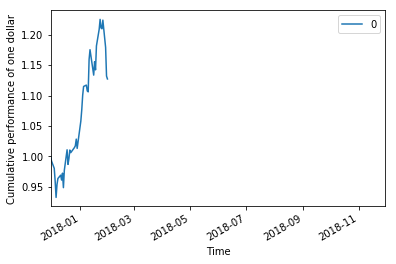

In [88]:
#computing portfolio returns
#dates_perf = r.iloc[7288:7540].index.get_level_values(0)

#p_perf = np.zeros(len(dates_perf))
#tmp = np.multiply(weights,r.iloc[7288:7540])
#p_perf = tmp.sum(axis=1)
#p_perf

p_perf = cum_return(r, 7288, 7540, weights)
print(type(p_perf))
#print(p_perf)
#total return index
dates_cumperf = r.iloc[7287:7540].index.get_level_values(0)
cumperf = np.cumprod(np.concatenate((np.ones(1),1+p_perf),axis=0),axis=0)
df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf)

df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')


print('\n (d) Cumulative performance of 1$ invested in December 1987:')
plt.show()

In [109]:
#ONES = np.ones(20)
#ONES[0:4].reshape(1,4)
prices.loc[start_months_dates[12]]['date']
#for o in range(12,len(start_months_dates)):
#    print (o)

Timestamp('1990-01-02 00:00:00')

In [223]:
# highs = np.zeros((30,len(prices.columns)-1))
# 29 iteration for 360 months 30 years, for 1 year each.
start_time = timeit.default_timer()

c_perf = pd.Series([]) # cumulative performance

for i in range(12,len(start_months_dates)-1): # 2 months 
    begdate = start_months_dates[i-12] #begining date index starts with 0, until 1
    
    enddate = start_months_dates[i] #ending date index starts with 12, until 13
    
    # getting past 52 weeks for a start of a month.
    mask = (prices['date'] >= prices.loc[begdate]['date']) & (prices['date'] <= prices.loc[enddate]['date'])
    prices_in_window = prices.loc[mask].drop(['date'],axis=1)
    #print('\nmask ', mask)
    #print('\n prices masked ', prices_in_window)
    
    # Eliminating newly listed or closed companies
    prices_in_window.dropna(axis=1, inplace=True)
    #print('\n after cleaning ', prices_in_window)
    
    # finding max of these 52 weeks for each stock.
    highs = prices_in_window.max()
    #lows = prices_in_window.min()
    #print('\n highs ', prices_in_window)
    lb = Lower_threshold * highs
    ub = Upper_threshold * highs
    #print('\n lb ', lb)    
    #print('\n ub ', ub)    
    assets_within_threshold = ((prices_in_window.gt(lb, axis=1)) | (prices_in_window.lt(ub, axis=1))).sum(axis=0)>0  
    #print('\nassets_within_threshold,\n',assets_within_threshold)
    begdate = start_months_dates[i] #begining date index starts with 12, until 13
    enddate = start_months_dates[i+1] #ending date index starts with 13, until 14
    
    mask_this_month = (prices['date'] >= prices.loc[begdate]['date']) & (prices['date'] <= prices.loc[enddate]['date'])
    prices_in_this_month = prices.loc[mask_this_month].drop(['date'],axis=1)
    #print('\nprices_in_this_month\n',prices_in_this_month)
    long_pos = prices_in_this_month[assets_within_threshold[assets_within_threshold].index]
    #print('\n\n ***long*** \n\n', long_pos)
    r = np.log(long_pos).diff()
    r = r.iloc[1:].dropna(axis=1)
    #print('\n\n ***r*** \n\n', r)
    weights = 1/r.columns.size
    #print('\nr,', r.head())
    dates_perf = r.index.get_level_values(0)
    p_perf = np.zeros(len(dates_perf))
    #print('\n size of logrets ', len(r.columns))
    #print('\n size of long_pos', len(long_pos))
    tmp = np.multiply(weights,r)
    p_perf = tmp.sum(axis=1)
    p_perf.replace([np.inf, -np.inf], 0, inplace=True)
    #print('\n\npperf\n\n',p_perf)
    c_perf = np.concatenate((c_perf, p_perf), axis=0)
    #print('\n\ncperf\n\n',c_perf)
    #checking if the price of that "month" reaches the 52 high threshold. 
    #companies = []
    #for month in range(12):
    #    start_months.drop(['date'],axis=1).loc[windows[i+month,0]]
    #    assets_within_threshold = ((prices_in_window.gt(lb, axis=1)) | (prices_in_window.lt(ub, axis=1))).sum(axis=0)>0
    #    long_pos = prices_in_window.columns[assets_within_threshold]
        
        
    #mask = (prices['date'] >= prices.loc[windows[i+1,1]]['date']) & (prices['date'] <= prices.loc[windows[i+1,0]]['date'])
    #prices_in_next_window =  prices.loc[mask].drop(['date'],axis=1)
    #if prices_in_next_window >= 0.9*highs & 

elapsed = timeit.default_timer() - start_time

C:\Users\Ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
C:\Users\Ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log



 (d) Cumulative performance of 1$ invested in the first day:


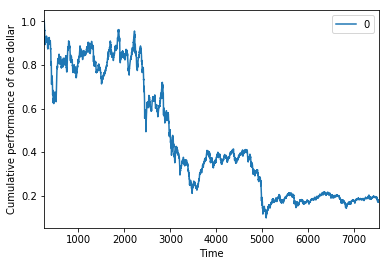

''

In [224]:
elapsed
begdate = start_months_dates[12]
enddate = start_months_dates[len(start_months_dates)-1]
plot_cum_return(prices, begdate, enddate, c_perf)

In [219]:
c_perf

array([ 0.00557306, -0.00393208, -0.00089826,  0.00078328, -0.00346524,
       -0.00762337,  0.00116954, -0.02315596, -0.00890418,  0.00342449,
       -0.00418446, -0.00251144,  0.003008  , -0.01919978, -0.0046423 ,
       -0.01072593, -0.00387077, -0.00647868, -0.00960217, -0.01610499,
        0.01189964,  0.00324942,  0.00798033,  0.00180106,  0.00090084,
        0.00796134,  0.00033573,  0.00293695, -0.00655152, -0.00350905,
       -0.00187512,  0.00847288, -0.00014028, -0.01320148, -0.00486721,
        0.0021466 , -0.00702125,  0.        ,  0.        ,  0.005431  ,
        0.00183964])

In [ ]:
c_perf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')


print('\n (d) Cumulative performance of 1$ invested in December 1987:')
plt.show()

In [220]:
def plot_cum_return(r, begdate, enddate, c_perf):
    """Computing portfolio returns in given time horizon, with specific weights

    Returns an array which shows the cumulative returns.
    """

    #total return index
    dates_cumperf = prices.iloc[begdate-1:enddate].index.get_level_values(0)
    cumperf = np.cumprod(np.concatenate((np.ones(1),1+c_perf),axis=0),axis=0)
    df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf)

    df_cumperf.plot()
    plt.xlabel('Time')
    plt.ylabel('Cumulative performance of one dollar')
    print('\n (d) Cumulative performance of 1$ invested in the first day:')
    plt.show()
    
    return ''

In [132]:
c_perf

array([ 0.00000000e+00,            -inf,            -inf,             inf,
        2.46296856e-04,             nan,             nan,             inf,
                  -inf,            -inf,             inf,             nan,
                   inf,  1.29455750e-03,            -inf,             nan,
                   inf,            -inf,  7.27919429e-04,  1.85664162e-03,
                  -inf,             inf,  1.92763308e-03,            -inf,
                   inf,            -inf,             nan,             nan,
       -5.82266784e-03,            -inf,             nan,             inf,
                  -inf,  1.47380999e-03,            -inf,            -inf,
                   inf,            -inf,             inf,            -inf,
       -1.59995838e-03,             inf,            -inf,             nan,
                   inf,            -inf,             inf,             nan,
                   inf,            -inf,             nan,             inf,
                   inf,  

In [29]:
mask = (prices['date'] >= prices.loc[7288]['date']) & (prices['date'] <= prices.loc[7540]['date'])
prices_in_window =  prices.loc[mask].drop(['date'],axis=1)
mask = (prices['date'] >= prices.loc[7036]['date']) & (prices['date'] <= prices.loc[7288]['date'])
prices_in_window2 =  prices.loc[mask].drop(['date'],axis=1)
print(prices_in_window.columns)
print(highs)


Index(['A', 'AA', 'AAA', 'AAAB', 'AAABB', 'AAAP', 'AAAU', 'AAB', 'AABA',
       'AABC',
       ...
       'ZVUE', 'ZVX', 'ZVXI', 'ZX', 'ZY', 'ZYME', 'ZYNE', 'ZYNX', 'ZYTC',
       'ZZ'],
      dtype='object', length=25572)
A         0.4375
AA       76.8750
AAA          NaN
AAAB         NaN
AAABB        NaN
          ...   
ZYME         NaN
ZYNE         NaN
ZYNX         NaN
ZYTC         NaN
ZZ           NaN
Length: 25572, dtype: float64


In [23]:
lb = Lower_threshold * highs
ub = Upper_threshold * highs

In [193]:
mask = (prices['date'] >= prices.loc[7288]['date']) & (prices['date'] <= prices.loc[7540]['date'])
prices_in_window =  prices.loc[mask].drop(['date'],axis=1)
wo_nan_df = prices_in_window.dropna(axis=1)
print(wo_nan_df.head())
highs = wo_nan_df.max()
lb = Lower_threshold * highs
ub = Upper_threshold * highs
assets_within_threshold = ((wo_nan_df.gt(lb, axis=1)) & (wo_nan_df.lt(ub, axis=1))).sum(axis=0)>0
print(assets_within_threshold)
long_pos = wo_nan_df.columns[assets_within_threshold]
print(long_pos)

ozi = prices.iloc[7288:7540][long_pos]
wo_nan_df[long_pos]

          A     AA   AABA   AAC   AADR    AAL    AAMC   AAME    AAN   AAOI  \
7288  68.69  41.64  70.10  8.97  55.56  49.00  71.900  3.700  39.19  43.38   
7289  66.24  41.79  68.31  8.84  55.27  49.93  72.950  3.600  37.65  44.05   
7290  65.83  41.18  68.13  8.44  55.31  49.47  73.000  3.500  37.51  42.46   
7291  65.89  41.31  69.41  8.50  55.59  49.61  72.200  3.625  37.72  40.74   
7292  66.71  40.60  70.22  8.89  56.25  50.88  73.375  3.500  38.43  38.84   

      ...     ZOM      ZROZ    ZSAN    ZSL    ZTO    ZTR    ZTS   ZUMZ  \
7288  ...  2.2300  120.3300  0.6200  33.43  16.00  13.28  72.30  19.95   
7289  ...  2.3400  120.6852  0.5830  33.80  15.83  13.43  71.02  21.35   
7290  ...  2.2500  121.5400  0.6294  34.74  15.61  13.40  70.85  20.65   
7291  ...  2.1815  122.5100  0.5990  35.34  15.77  13.41  70.97  21.05   
7292  ...  2.2300  120.9200  0.5710  36.47  16.02  13.40  71.64  21.15   

        ZYME   ZYNE  
7288  7.8800  14.58  
7289  7.9332  13.37  
7290  8.4776  13.01 

,A,AA,AABA,AAC,AADR,AAL,AAMC,AAME,AAN,AAOI,...,ZNH,ZROZ,ZSAN,ZSL,ZTO,ZTR,ZTS,ZUMZ,ZYME,ZYNE
7288,68.69,41.64,70.10,8.97,55.56,49.00,71.900,3.7000,39.19,43.38,...,43.84,120.3300,0.6200,33.430,16.00,13.2800,72.30,19.95,7.8800,14.58
7289,66.24,41.79,68.31,8.84,55.27,49.93,72.950,3.6000,37.65,44.05,...,45.71,120.6852,0.5830,33.800,15.83,13.4300,71.02,21.35,7.9332,13.37
7290,65.83,41.18,68.13,8.44,55.31,49.47,73.000,3.5000,37.51,42.46,...,45.09,121.5400,0.6294,34.740,15.61,13.4000,70.85,20.65,8.4776,13.01
7291,65.89,41.31,69.41,8.50,55.59,49.61,72.200,3.6250,37.72,40.74,...,43.90,122.5100,0.5990,35.340,15.77,13.4100,70.97,21.05,8.7900,11.56
7292,66.71,40.60,70.22,8.89,56.25,50.88,73.375,3.5000,38.43,38.84,...,44.24,120.9200,0.5710,36.470,16.02,13.4000,71.64,21.15,8.5800,11.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,69.36,31.19,64.16,2.00,43.60,38.29,48.000,2.8225,47.16,20.00,...,33.83,104.4800,3.7500,44.450,16.60,9.8700,90.20,19.23,12.0000,4.92
7537,71.48,33.60,65.43,2.05,44.46,38.94,47.950,2.8500,47.10,20.66,...,34.33,103.7500,3.8600,43.300,17.10,9.9102,92.80,19.23,13.5000,4.92
7538,71.57,30.99,64.42,2.00,44.35,38.42,46.770,2.8600,47.53,20.28,...,33.66,104.0300,3.7500,43.370,16.93,9.9700,92.77,19.21,13.0100,4.82
7539,72.35,31.81,65.59,1.97,44.21,40.16,48.410,2.8300,46.80,20.59,...,34.31,104.7900,3.7400,44.180,17.16,9.9900,93.87,19.72,12.8700,4.82


In [205]:
assets_within_threshold.value_counts()

True     6435
False     297
dtype: int64

In [208]:
assets_within_threshold[assets_within_threshold].index

Index(['A', 'AA', 'AABA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
       ...
       'ZNH', 'ZROZ', 'ZSAN', 'ZSL', 'ZTO', 'ZTR', 'ZTS', 'ZUMZ', 'ZYME',
       'ZYNE'],
      dtype='object', length=6435)

In [69]:
weights = 1/len(long_pos)
dates_perf = prices.index.get_level_values(0)
dates_perf

RangeIndex(start=0, stop=7559, step=1)

In [13]:
start_months.drop(['date'],axis=1).loc[windows[0,0]]

A        74.67
AA       32.05
AAA        NaN
AAAB       NaN
AAABB      NaN
         ...  
ZYME     12.82
ZYNE      5.13
ZYNX       NaN
ZYTC       NaN
ZZ         NaN
Name: 7540, Length: 25572, dtype: float64

Timestamp('1989-01-03 00:00:00')

Name              5
Age              32
Address           5
Qualification    45
dtype: int64

In [ ]:
# list iteration
newlist = []
for x in range(10):
    innerlist = []
    for y in range(10):
        innerlist.append(y)
    newlist.append(innerlist)

print(newlist)

In [13]:
high=max(y)
low=min(y)
print("Today, Price, High, Low, % from low ")
print(y.iloc[-1], y.iloc[0], high, low, round((y.iloc[-1]-low)/(high-low)*100,2))

Today, Price, High, Low, % from low 
0.022486331942106474 0.009363225126959307 0.07549884053048306 -0.10197880411141558 70.13


In [14]:
prices_without_date = prices.drop(columns='date')

In [18]:
logrets_wo_date = logrets.drop(columns='date')

In [19]:
RollingHighes = logrets_wo_date.rolling(window=252).max()

In [20]:
RollingHighes

,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,AABC,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,0.075499,0.074429,NaN,NaN,NaN,NaN,NaN,NaN,0.045889,NaN,...,NaN,NaN,NaN,NaN,NaN,0.15,0.15,NaN,NaN,NaN
7554,0.075499,0.076151,NaN,NaN,NaN,NaN,NaN,NaN,0.045889,NaN,...,NaN,NaN,NaN,NaN,NaN,0.15,0.15,NaN,NaN,NaN
7555,0.075499,0.076151,NaN,NaN,NaN,NaN,NaN,NaN,0.045889,NaN,...,NaN,NaN,NaN,NaN,NaN,0.15,0.15,NaN,NaN,NaN
7556,0.075499,0.076151,NaN,NaN,NaN,NaN,NaN,NaN,0.045889,NaN,...,NaN,NaN,NaN,NaN,NaN,0.15,0.15,NaN,NaN,NaN


In [21]:
threshold_multiple_high = 0.7 #top 30%
threshold_multiple_low = 0.3 #bottom 30%

In [27]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]) 
ser = pd.Series(a)
ser.rolling(window=3).max()

0      NaN
1      NaN
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
dtype: float64

In [ ]:
#highs = np.zeros((30,len(prices.columns)-1))
# 29 iteration for 360 months 30 years, for 1 year each.
p_perf = pd.Series([])
for i in range(29):
    # getting past 52 weeks
    mask = (prices['date'] >= prices.loc[windows[i,1]]['date']) & (prices['date'] <= prices.loc[windows[i,0]]['date'])
    prices_in_window =  prices.loc[mask].drop(['date'],axis=1)
    # finding max of these 52 weeks for each stock.
    highs = prices_in_window.max()
    #lows = prices_in_window.min()
    lb = Lower_threshold * highs
    ub = Upper_threshold * highs
    #checking if the price of that "month" reaches the 52 high threshold. 
    #companies = []
    for month in range(12):
        start_months.drop(['date'],axis=1).loc[windows[i+month,0]]
        assets_within_threshold = ((prices_in_window.gt(lb, axis=1)) | (prices_in_window.lt(ub, axis=1))).sum(axis=0)>0
        long_pos = prices_in_window.columns[assets_within_threshold]
        
        
    mask = (prices['date'] >= prices.loc[windows[i+1,1]]['date']) & (prices['date'] <= prices.loc[windows[i+1,0]]['date'])
    prices_in_next_window =  prices.loc[mask].drop(['date'],axis=1)
    #if prices_in_next_window >= 0.9*highs & 